## Imported the necessary libraries

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler, PowerTransformer, MinMaxScaler, QuantileTransformer, RobustScaler, MaxAbsScaler

from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# from imblearn.over_sampling import SMOTE
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# !pip install xgboost
# !pip install imbalanced-learn

## Changed some of the default options of the pandas library

In [2]:
pd.set_option("display.max_columns", None)
pd.options.display.max_rows = 500
pd.options.mode.chained_assignment = None  # default='warn'

## Creation of the training and testing dataframes

In [3]:
tr_d_transaction = pd.read_csv("../Datasets/Project_IM/1/train_transaction.csv")
tr_d_identity = pd.read_csv("../Datasets/Project_IM/1/train_identity.csv")
t_d_transaction = pd.read_csv("../Datasets/Project_IM/1/test_transaction.csv")
t_d_identity = pd.read_csv("../Datasets/Project_IM/1/test_identity.csv")

## Overview of the statistical metrics of the numerical features of the training dataframe

In [4]:
tr_d_transaction.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
count,5.905400e+05,590540.000000,5.905400e+05,590540.000000,590540.000000,581607.000000,588975.000000,586281.000000,524834.000000,524834.000000,238269.000000,37627.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,589271.000000,309743.000000,327662.000000,421618.000000,280699.000000,73187.000000,38917.000000,74926.000000,74926.000000,514518.000000,311253.000000,64717.000000,61952.000000,62187.000000,501427.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,421571.000000,421571.000000,421571.000000,421571.00000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,590226.000000,590226.00000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.00

## Checking the datatype for the training transaction data

In [5]:
tr_d_transaction.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Data columns (total 394 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   TransactionID   590540 non-null  int64  
 1   isFraud         590540 non-null  int64  
 2   TransactionDT   590540 non-null  int64  
 3   TransactionAmt  590540 non-null  float64
 4   ProductCD       590540 non-null  object 
 5   card1           590540 non-null  int64  
 6   card2           581607 non-null  float64
 7   card3           588975 non-null  float64
 8   card4           588963 non-null  object 
 9   card5           586281 non-null  float64
 10  card6           588969 non-null  object 
 11  addr1           524834 non-null  float64
 12  addr2           524834 non-null  float64
 13  dist1           238269 non-null  float64
 14  dist2           37627 non-null   float64
 15  P_emaildomain   496084 non-null  object 
 16  R_emaildomain   137291 non-null  object 
 17  C1       

Checking the shape of the training transaction data.

In [6]:
tr_d_transaction.shape

(590540, 394)

## Checking the null values within the training transaction data

In [7]:
tr_d_transaction.isnull().sum()

TransactionID          0
isFraud                0
TransactionDT          0
TransactionAmt         0
ProductCD              0
card1                  0
card2               8933
card3               1565
card4               1577
card5               4259
card6               1571
addr1              65706
addr2              65706
dist1             352271
dist2             552913
P_emaildomain      94456
R_emaildomain     453249
C1                     0
C2                     0
C3                     0
C4                     0
C5                     0
C6                     0
C7                     0
C8                     0
C9                     0
C10                    0
C11                    0
C12                    0
C13                    0
C14                    0
D1                  1269
D2                280797
D3                262878
D4                168922
D5                309841
D6                517353
D7                551623
D8                515614
D9                515614


## Dropping the features with null values of over 100000

In [8]:
a = tr_d_transaction.isnull().sum()> 100000
first_drop_list = list(a[a].index)

In [9]:
tr_d_transaction.drop(first_drop_list, axis=1, inplace=True)

In [10]:
tr_d_transaction.isnull().sum()

TransactionID         0
isFraud               0
TransactionDT         0
TransactionAmt        0
ProductCD             0
card1                 0
card2              8933
card3              1565
card4              1577
card5              4259
card6              1571
addr1             65706
addr2             65706
P_emaildomain     94456
C1                    0
C2                    0
C3                    0
C4                    0
C5                    0
C6                    0
C7                    0
C8                    0
C9                    0
C10                   0
C11                   0
C12                   0
C13                   0
C14                   0
D1                 1269
D10               76022
D15               89113
V12               76073
V13               76073
V14               76073
V15               76073
V16               76073
V17               76073
V18               76073
V19               76073
V20               76073
V21               76073
V22             

## Labelling the categorical values of the training transaction data

Replacing the small amount of categorical value "debit or credit" and "charge card" with NaN within the "card6" column.

In [11]:
tr_d_transaction['card6'] = tr_d_transaction['card6'].replace({'debit or credit':np.NaN, 'charge card':np.NaN})

Dropping the "P_emaildomain" column as there is no meainingful way to encode the column. Also, it contains over 90000 null values as seen previously.

In [12]:
tr_d_transaction.P_emaildomain.value_counts()

gmail.com           228355
yahoo.com           100934
hotmail.com          45250
anonymous.com        36998
aol.com              28289
comcast.net           7888
icloud.com            6267
outlook.com           5096
msn.com               4092
att.net               4033
live.com              3041
sbcglobal.net         2970
verizon.net           2705
ymail.com             2396
bellsouth.net         1909
yahoo.com.mx          1543
me.com                1522
cox.net               1393
optonline.net         1011
charter.net            816
live.com.mx            749
rocketmail.com         664
mail.com               559
earthlink.net          514
gmail                  496
outlook.es             438
mac.com                436
juno.com               322
aim.com                315
roadrunner.com         305
hotmail.es             305
windstream.net         305
hotmail.fr             295
frontier.com           280
embarqmail.com         260
web.de                 240
netzero.com            230
t

In [13]:
tr_d_transaction.drop('P_emaildomain', axis=1, inplace=True)

Encoding the rest of the categorical columns of transaction training data

In [14]:
tr_d_transaction['ProductCD'] = tr_d_transaction['ProductCD'].replace({'W':0, 'C':1, 'R':2, 'H':3, 'S':4})
tr_d_transaction['ProductCD'].value_counts()

0    439670
1     68519
2     37699
3     33024
4     11628
Name: ProductCD, dtype: int64

In [15]:
tr_d_transaction['card4'] = tr_d_transaction['card4'].replace({'visa':0, 'mastercard':1, 'american express':2, 'discover':3})
tr_d_transaction['card4'].value_counts()

0.0    384767
1.0    189217
2.0      8328
3.0      6651
Name: card4, dtype: int64

In [16]:
tr_d_transaction['card6'] = tr_d_transaction['card6'].replace({'debit':0, 'credit':1})
tr_d_transaction['card6'].value_counts()

0.0    439938
1.0    148986
Name: card6, dtype: int64

In [17]:
tr_d_transaction.isnull().sum()

TransactionID         0
isFraud               0
TransactionDT         0
TransactionAmt        0
ProductCD             0
card1                 0
card2              8933
card3              1565
card4              1577
card5              4259
card6              1616
addr1             65706
addr2             65706
C1                    0
C2                    0
C3                    0
C4                    0
C5                    0
C6                    0
C7                    0
C8                    0
C9                    0
C10                   0
C11                   0
C12                   0
C13                   0
C14                   0
D1                 1269
D10               76022
D15               89113
V12               76073
V13               76073
V14               76073
V15               76073
V16               76073
V17               76073
V18               76073
V19               76073
V20               76073
V21               76073
V22               76073
V23             

## Filling the remaining null values with mean and mode 

In [18]:
tr_d_transaction['card4'].fillna((tr_d_transaction['card6'].mode()[0]), inplace=True)

In [19]:
tr_d_transaction['card6'].fillna((tr_d_transaction['card6'].mode()[0]), inplace=True)

In [20]:
b = tr_d_transaction.isnull().sum()> 50000
second_drop_list = list(b[b].index)
tr_d_transaction.drop(second_drop_list, axis=1, inplace=True)

In [21]:
tr_d_transaction.fillna(tr_d_transaction.mean(), inplace=True)

## Checking the null values for training identity data

In [22]:
tr_d_identity.isnull().sum()

TransactionID         0
id_01                 0
id_02              3361
id_03             77909
id_04             77909
id_05              7368
id_06              7368
id_07            139078
id_08            139078
id_09             69307
id_10             69307
id_11              3255
id_12                 0
id_13             16913
id_14             64189
id_15              3248
id_16             14893
id_17              4864
id_18             99120
id_19              4915
id_20              4972
id_21            139074
id_22            139064
id_23            139064
id_24            139486
id_25            139101
id_26            139070
id_27            139064
id_28              3255
id_29              3255
id_30             66668
id_31              3951
id_32             66647
id_33             70944
id_34             66428
id_35              3248
id_36              3248
id_37              3248
id_38              3248
DeviceType         3423
DeviceInfo        25567
dtype: int64

## Dropping features with over 40000 null values

In [23]:
c = tr_d_identity.isnull().sum()>40000
third_drop_list = list(c[c].index)
tr_d_identity.drop(third_drop_list, axis=1, inplace=True)

In [24]:
tr_d_identity.isnull().sum()

TransactionID        0
id_01                0
id_02             3361
id_05             7368
id_06             7368
id_11             3255
id_12                0
id_13            16913
id_15             3248
id_16            14893
id_17             4864
id_19             4915
id_20             4972
id_28             3255
id_29             3255
id_31             3951
id_35             3248
id_36             3248
id_37             3248
id_38             3248
DeviceType        3423
DeviceInfo       25567
dtype: int64

## Checking and encoding the categorical columns

In [25]:
list_of_objects = tr_d_identity.select_dtypes(include=['object']).columns
list_of_objects

Index(['id_12', 'id_15', 'id_16', 'id_28', 'id_29', 'id_31', 'id_35', 'id_36',
       'id_37', 'id_38', 'DeviceType', 'DeviceInfo'],
      dtype='object')

In [26]:
tr_d_identity.id_12.value_counts()

NotFound    123025
Found        21208
Name: id_12, dtype: int64

In [27]:
tr_d_identity.id_15.value_counts()

Found      67728
New        61612
Unknown    11645
Name: id_15, dtype: int64

In [28]:
tr_d_identity.id_16.value_counts()

Found       66324
NotFound    63016
Name: id_16, dtype: int64

In [29]:
tr_d_identity.id_28.value_counts()

Found    76232
New      64746
Name: id_28, dtype: int64

In [30]:
tr_d_identity.id_29.value_counts()

Found       74926
NotFound    66052
Name: id_29, dtype: int64

In [31]:
tr_d_identity.id_31.value_counts()

chrome 63.0                       22000
mobile safari 11.0                13423
mobile safari generic             11474
ie 11.0 for desktop                9030
safari generic                     8195
chrome 62.0                        7182
chrome 65.0                        6871
chrome 64.0                        6711
chrome 63.0 for android            5806
chrome generic                     4778
chrome 66.0                        4264
edge 16.0                          4188
chrome 64.0 for android            3473
chrome 65.0 for android            3336
firefox 57.0                       3315
mobile safari 10.0                 2779
chrome 66.0 for android            2349
chrome 62.0 for android            2097
edge 15.0                          1600
chrome generic for android         1158
firefox 59.0                       1099
samsung browser 6.2                1061
firefox 58.0                        833
chrome 49.0                         719
firefox                             673


In [32]:
tr_d_identity.id_35.value_counts()

T    77814
F    63171
Name: id_35, dtype: int64

In [33]:
tr_d_identity.id_36.value_counts()

F    134066
T      6919
Name: id_36, dtype: int64

In [34]:
tr_d_identity.id_37.value_counts()

T    110452
F     30533
Name: id_37, dtype: int64

In [35]:
tr_d_identity.id_38.value_counts()

F    73922
T    67063
Name: id_38, dtype: int64

In [36]:
tr_d_identity.DeviceType.value_counts()

desktop    85165
mobile     55645
Name: DeviceType, dtype: int64

In [37]:
tr_d_identity.DeviceInfo.value_counts()

Windows        47722
iOS Device     19782
MacOS          12573
Trident/7.0     7440
rv:11.0         1901
               ...  
Swift              1
ZA409              1
Coolpad            1
KYY22              1
VS880              1
Name: DeviceInfo, Length: 1786, dtype: int64

Dropping the "id_31" and "DeviceInfo" columns as there are no meaningful way to encode the columns. 

In [38]:
tr_d_identity.drop(['id_31', 'DeviceInfo'], axis=1, inplace=True)

In [39]:
tr_d_identity['id_12'] = tr_d_identity['id_12'].replace({'NotFound':0, 'Found':1})
tr_d_identity['id_15'] = tr_d_identity['id_15'].replace({'Found':0, 'New':1, 'Unknown':-1})
tr_d_identity['id_16'] = tr_d_identity['id_16'].replace({'NotFound':0, 'Found':1})
tr_d_identity['id_28'] = tr_d_identity['id_28'].replace({'Found':0, 'New':1})
tr_d_identity['id_29'] = tr_d_identity['id_29'].replace({'NotFound':0, 'Found':1})
tr_d_identity['id_35'] = tr_d_identity['id_35'].replace({'F':0, 'T':1})
tr_d_identity['id_36'] = tr_d_identity['id_36'].replace({'F':0, 'T':1})
tr_d_identity['id_37'] = tr_d_identity['id_37'].replace({'F':0, 'T':1})
tr_d_identity['id_38'] = tr_d_identity['id_38'].replace({'F':0, 'T':1})
tr_d_identity['DeviceType'] = tr_d_identity['DeviceType'].replace({'mobile':0, 'desktop':1})

Checking correlation using heatmap to reduce features for the training identity data.

<AxesSubplot:>

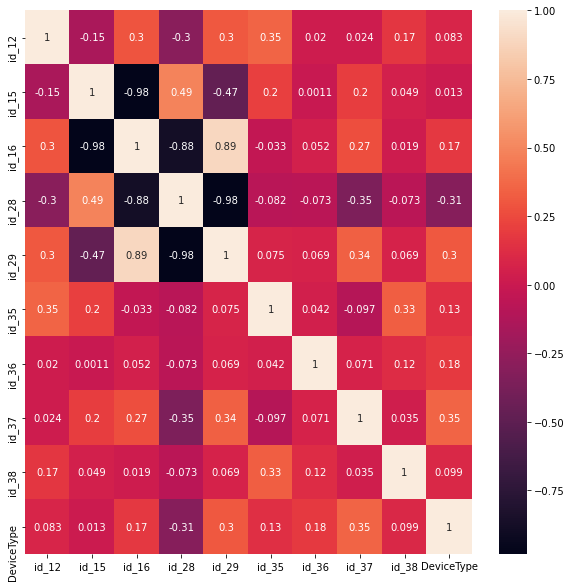

In [40]:
b=tr_d_identity[['id_12', 'id_15', 'id_16', 'id_28', 'id_29', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType']].corr()[['id_12', 'id_15', 'id_16', 'id_28', 'id_29', 
                                                                                                                        'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType']][:]
plt.figure(figsize=(10,10))
sns.heatmap(b, annot=True)

In [41]:
tr_d_identity.drop(['id_16', 'id_28'], axis=1, inplace=True)

## Replacing remaining null values with mean and mode in training identity data

In [42]:
col_name_mode = ['id_15', 'id_29', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType']

for column in col_name_mode:
    tr_d_identity[column].fillna(tr_d_identity[column].mode()[0], inplace=True)

In [43]:
col_name_mean = ['id_02', 'id_05', 'id_06', 'id_11', 'id_13', 'id_17', 'id_19', 'id_20']

for column in col_name_mean:
    tr_d_identity[column].fillna(tr_d_identity[column].mean(), inplace=True)

In [44]:
tr_d_identity.isnull().sum()

TransactionID    0
id_01            0
id_02            0
id_05            0
id_06            0
id_11            0
id_12            0
id_13            0
id_15            0
id_17            0
id_19            0
id_20            0
id_29            0
id_35            0
id_36            0
id_37            0
id_38            0
DeviceType       0
dtype: int64

## Joining training transaction and identity data

In [45]:
tr_join_left = pd.merge(tr_d_transaction, tr_d_identity, how="left", on='TransactionID')
tr_join_left

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,id_01,id_02,id_05,id_06,id_11,id_12,id_13,id_15,id_17,id_19,id_20,id_29,id_35,id_36,id_37,id_38,DeviceType
0,2987000,0,86400,68.50,0,13926,362.555488,150.0,3.0,142.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,117.000000,0.000000,0.0,0.000000,0.0,0.0,117.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,117.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,117.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.00,0,2755,404.000000,150.0,1.0,102.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.00,0,4663,490.000000,150.0,0.0,166.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.00,0,18132,567.000000,150.0,1.0,117.0,0.0,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,1.0,48.0,28.0,0.0,10.0,4.0,1.0,38.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,50.000000,1758.000000,925.000000,0.0,354.000000,135.0,50.0,1404.0,790.0,0.000000,0.000000,0.000000,1.0,28.0,0.0,0.0,0.0,0.0,10.0,0.0,4.0,0.0,0.0,1.0,1.0,1.0,1.0,38.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,50.000000,1758.000000,925.000000,0.0,354.000000,0.0,135.0,0.000000,0.000000,0.000000,50.0,1404.0,790.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.00,3,4497,514.000000,150.0,1.0,102.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,70787.0,1.615585,-6.69871,100.0,0.0,48.053071,1.0,166.0,542.0,144.0,0.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

Dropping the columns with over 100000 null values after merging.

In [46]:
d = tr_join_left.isnull().sum()> 100000
fourth_drop_list = list(d[d].index)
tr_join_left.drop(fourth_drop_list, axis=1, inplace=True)

In [47]:
tr_join_left.drop(['TransactionID'], axis=1, inplace=True)

## Checking test transaction and training data metrics 

In [48]:
t_d_transaction.describe()

,TransactionID,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
count,5.066910e+05,5.066910e+05,506691.000000,506691.000000,498037.000000,503689.000000,502144.000000,441082.000000,441082.000000,215474.000000,36436.000000,506688.000000,506688.000000,506688.000000,506688.000000,506688.000000,506688.000000,506688.000000,506688.000000,506688.000000,506688.000000,506688.000000,506688.000000,501943.000000,506688.000000,500660.000000,271922.000000,303549.000000,429840.000000,282316.000000,124783.000000,60133.000000,74338.000000,74338.000000,494146.000000,330173.000000,69254.000000,123384.000000,115194.000000,494622.000000,330173.000000,330173.000000,330173.000000,330173.000000,330173.000000,330173.000000,330173.000000,330173.000000,330173.000000,330173.000000,330173.000000,494102.000000,494102.000000,494102.000000,494102.000000,494102.000000,494102.000000,494102.000000,494102.000000,494102.000000,494102.000000,494102.000000,494102.000000,494102.000000,494102.000000,494102.000000,494102.000000,494102.000000,494102.000000,494102.000000,494102.000000,494102.000000,494102.000000,494102.000000,429837.000000,429837.000000,429837.000000,429837.000000,429837.00000,429837.000000,429837.000000,429837.000000,429837.000000,429837.000000,429837.000000,429837.000000,429837.000000,429837.000000,429837.000000,429837.000000,429837.000000,429837.000000,493792.000000,493792.000000,493792.000000,493792.000000,493792.000000,493792.000000,493792.000000,493792.000000,493792.000000,493792.000000,493792.000000,493792.000000,493792.000000,493792.00000,493792.000000,493792.000000,493792.000000,493792.000000,493792.000000,493792.000000,493792.000000,493792.000000,494610.000000,494610.000000,494610.000000,494610.000000,494610.000000,494610.000000,494610.000000,494610.000000,494610.000000,494610.000000,494610.000000,494610.000000,494610.000000,494610.000000,494610.000000,494610.000000,494610.000000,494610.000000,494610.000000,494610.000000,506691.000000,506691.000000,506691.000000,506691.000000,506691.000000,506691.000000,506691.000000,506691.000000,506691.000000,506691.000000,506691.000000,506691.000000,506691.0,506691.000000,506691.000000,506691.000000,506691.000000,506691.000000,506691.000000,506691.000000,506691.000000,506691.000000,506691.000000,506691.000000,506691.000000,50669

In [49]:
t_d_identity.describe()

,TransactionID,id-01,id-02,id-03,id-04,id-05,id-06,id-07,id-08,id-09,id-10,id-11,id-13,id-14,id-17,id-18,id-19,id-20,id-21,id-22,id-24,id-25,id-26,id-32
count,1.419070e+05,141907.000000,136976.000000,66481.000000,66481.000000,134750.000000,134750.000000,5059.000000,5059.000000,74338.000000,74338.000000,136778.000000,130286.000000,71357.000000,135966.000000,50875.000000,135906.000000,135633.000000,5059.000000,5062.000000,4740.000000,5039.000000,5047.000000,70671.000000
mean,3.972166e+06,-11.325734,192658.729909,0.053008,-0.087454,1.246033,-6.803829,12.493180,-36.577782,0.076219,-0.245877,99.750876,36.905715,-344.482672,191.070341,14.795735,350.122982,408.886230,507.727021,15.336823,13.166667,332.043064,152.752923,26.217939
std,1.469966e+05,14.508520,182613.277215,0.684551,0.840351,5.071394,15.921457,11.678206,25.544185,1.009687,2.120525,1.119819,13.206713,93.633156,30.749535,2.318496,139.140824,158.971756,227.371061,5.618032,3.222440,86.356683,31.916995,3.601046
min,3.663586e+06,-100.000000,2.000000,-12.000000,-19.000000,-81.000000,-100.000000,-41.000000,-100.000000,-32.000000,-100.000000,90.000000,11.000000,-720.000000,100.000000,11.000000,100.000000,100.000000,100.000000,11.000000,10.000000,100.000000,100.000000,8.000000
25%,3.859268e+06,-12.500000,63339.500000,0.000000,0.000000,0.000000,-6.000000,3.000000,-46.000000,0.000000,0.000000,100.000000,27.000000,-360.000000,166.000000,13.000000,266.000000,256.000000,252.000000,14.000000,11.000000,321.000000,137.000000,24.000000
50%,4.001774e+06,-5.000000,133189.500000,0.000000,0.000000,0.000000,0.000000,12.000000,-33.000000,0.000000,0.000000,100.000000,27.000000,-300.000000,166.000000,15.000000,321.000000,484.000000,576.000000,14.000000,11.000000,321.000000,147.000000,24.000000
75%,4.105284e+06,-5.000000,265717.500000,0.000000,0.000000,1.000000,0.000000,21.000000,-23.000000,0.000000,0.000000,100.000000,52.000000,-300.000000,225.000000,15.000000,427.000000,549.000000,711.000000,14.000000,15.000000,355.000000,182.000000,32.000000
max,4.170239e+06,0.000000,999869.000000,11.000000,0.000000,52.000000,0.000000,59.000000,0.000000,16.000000,0.000000,100.000000,63.000000,720.000000,228.000000,29.000000,670.000000,660.000000,854.000000,44.000000,26.000000,549.000000,216.000000,48.000000


## Checking the null values within transaction and identity data

In [50]:
t_d_identity.isnull().sum()

TransactionID         0
id-01                 0
id-02              4931
id-03             75426
id-04             75426
id-05              7157
id-06              7157
id-07            136848
id-08            136848
id-09             67569
id-10             67569
id-11              5129
id-12                 0
id-13             11621
id-14             70550
id-15              4930
id-16             16160
id-17              5941
id-18             91032
id-19              6001
id-20              6274
id-21            136848
id-22            136845
id-23            136845
id-24            137167
id-25            136868
id-26            136860
id-27            136845
id-28              5129
id-29              5129
id-30             71248
id-31              5282
id-32             71236
id-33             71236
id-34             69732
id-35              4930
id-36              4930
id-37              4930
id-38              4930
DeviceType         4976
DeviceInfo        26850
dtype: int64

In [51]:
t_d_transaction.isnull().sum()

TransactionID          0
TransactionDT          0
TransactionAmt         0
ProductCD              0
card1                  0
card2               8654
card3               3002
card4               3086
card5               4547
card6               3007
addr1              65609
addr2              65609
dist1             291217
dist2             470255
P_emaildomain      69192
R_emaildomain     370821
C1                     3
C2                     3
C3                     3
C4                     3
C5                     3
C6                     3
C7                     3
C8                     3
C9                     3
C10                    3
C11                    3
C12                    3
C13                 4748
C14                    3
D1                  6031
D2                234769
D3                203142
D4                 76851
D5                224375
D6                381908
D7                446558
D8                432353
D9                432353
D10                12545


## Keeping only the columns from the training transaction data

In [52]:
test_col = list(tr_d_transaction.columns)
test_col.remove('isFraud')
t_d_transaction = t_d_transaction[test_col]
t_d_transaction.isnull().sum()

TransactionID        0
TransactionDT        0
TransactionAmt       0
ProductCD            0
card1                0
card2             8654
card3             3002
card4             3086
card5             4547
card6             3007
C1                   3
C2                   3
C3                   3
C4                   3
C5                   3
C6                   3
C7                   3
C8                   3
C9                   3
C10                  3
C11                  3
C12                  3
C13               4748
C14                  3
D1                6031
V95                  0
V96                  0
V97                  0
V98                  0
V99                  0
V100                 0
V101                 0
V102                 0
V103                 0
V104                 0
V105                 0
V106                 0
V107                 0
V108                 0
V109                 0
V110                 0
V111                 0
V112                 0
V113       

## Encoding the categorical features and replacing the null values of the test transaction data

In [53]:
t_d_transaction['ProductCD'] = t_d_transaction['ProductCD'].replace({'W':0, 'C':1, 'R':2, 'H':3, 'S':4})

In [54]:
t_d_transaction['card4'] = t_d_transaction['card4'].replace({'visa':0, 'mastercard':1, 'american express':2, 'discover':3})

In [55]:
t_d_transaction['card6'] = t_d_transaction['card6'].replace({'charge card':np.NaN})

In [56]:
t_d_transaction['card6'] = t_d_transaction['card6'].replace({'debit':0, 'credit':1})

In [57]:
t_d_transaction['card4'].fillna((t_d_transaction['card4'].mode()[0]), inplace=True)

In [58]:
t_d_transaction['card6'].fillna((t_d_transaction['card6'].mode()[0]), inplace=True)

In [59]:
t_d_transaction.fillna(t_d_transaction.mean(), inplace=True)

In [60]:
t_d_transaction.isnull().sum()

TransactionID     0
TransactionDT     0
TransactionAmt    0
ProductCD         0
card1             0
card2             0
card3             0
card4             0
card5             0
card6             0
C1                0
C2                0
C3                0
C4                0
C5                0
C6                0
C7                0
C8                0
C9                0
C10               0
C11               0
C12               0
C13               0
C14               0
D1                0
V95               0
V96               0
V97               0
V98               0
V99               0
V100              0
V101              0
V102              0
V103              0
V104              0
V105              0
V106              0
V107              0
V108              0
V109              0
V110              0
V111              0
V112              0
V113              0
V114              0
V115              0
V116              0
V117              0
V118              0
V119              0


## Manually selecting the training identity columns since the test identity column names for id are incorrect

In [61]:
test_col_i = ['id-06', 'id-29', 'id-12', 'id-15', 'id-05', 'id-11', 'id-20', 'id-36', 'id-01', 
              'id-13', 'id-17', 'id-19', 'id-37', 'id-35', 'id-38', 'DeviceType', 'TransactionID']
t_d_identity = t_d_identity[test_col_i]
t_d_identity.isnull().sum()

id-06             7157
id-29             5129
id-12                0
id-15             4930
id-05             7157
id-11             5129
id-20             6274
id-36             4930
id-01                0
id-13            11621
id-17             5941
id-19             6001
id-37             4930
id-35             4930
id-38             4930
DeviceType        4976
TransactionID        0
dtype: int64

## Encoding the categorical columns and replacing the null values 

In [62]:
t_d_identity['id-12'] = t_d_identity['id-12'].replace({'NotFound':0, 'Found':1})
t_d_identity['id-15'] = t_d_identity['id-15'].replace({'Found':0, 'New':1, 'Unknown':-1})
t_d_identity['id-29'] = t_d_identity['id-29'].replace({'NotFound':0, 'Found':1})
t_d_identity['id-35'] = t_d_identity['id-35'].replace({'F':0, 'T':1})
t_d_identity['id-36'] = t_d_identity['id-36'].replace({'F':0, 'T':1})
t_d_identity['id-37'] = t_d_identity['id-37'].replace({'F':0, 'T':1})
t_d_identity['id-38'] = t_d_identity['id-38'].replace({'F':0, 'T':1})
t_d_identity['DeviceType'] = t_d_identity['DeviceType'].replace({'mobile':0, 'desktop':1})

In [63]:
col_name_mode_test = ['id-15', 'id-29', 'id-35', 'id-36', 'id-37', 'id-38', 'DeviceType']

for column in col_name_mode_test:
    t_d_identity[column].fillna(t_d_identity[column].mode()[0], inplace=True)

In [64]:
col_name_mean_test = ['id-05', 'id-06', 'id-11', 'id-13', 'id-17', 'id-19', 'id-20']

for column in col_name_mean_test:
    t_d_identity[column].fillna(t_d_identity[column].mean(), inplace=True)

## Joining the transaction and identity test data

In [65]:
t_join_left = pd.merge(t_d_transaction, t_d_identity, how="left", on='TransactionID')
t_join_left

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,id-06,id-29,id-12,id-15,id-05,id-11,id-20,id-36,id-01,id-13,id-17,id-19,id-37,id-35,id-38,DeviceType
0,3663549,18403224,31.950,0,10409,111.0,150.0,0.0,226.0,0.0,6.0,6.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,5.0,1.0,115.0,6.0,419.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,47.950001,0.000000,0.000000,47.950001,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,47.950001,0.000000,0.000000,47.950001,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.000,0,4272,111.0,150.0,0.0,226.0,0.0,3.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,12.0,2.0,149.0,0.0,4.0,1.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,280.000000,77.000000,0.000000,280.000000,77.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,280.000000,77.000000,0.000000,280.000000,0.000000,77.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.000,0,4476,574.0,150.0,0.0,226.0,0.0,2.0,2.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,2.0,0.0,22.0,2.0,137.0,0.0,5.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,968.000000,0.000000,0.000000,705.000000,0.000000,0.0,0.0,0.0,0.0,263.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,1321.000000,0.000000,0.000000,1058.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,263.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.950,0,10989,360.0,150.0,0.0,166.0,0.0,5.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,7.0,4.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,282.540009,282.540009,282.540009,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.950,0,18018,452.0,150.0,1.0,117.0,0.0,6.0,6.0,0.0,0.0,2.0,5.0,0.0,0.0,5.0,0.0,6.0,0.0,14.0,6.0,22.0,1.0,3.0,1.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,67.949997,183.850006,67.949997,67.949997,183.850006,67.949997,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,67.949997,183.850006,67.949997,67.949997,183.850006,67.949997,67.949997,67.949997,183.850006,67.949997,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

Dropping the columns with over 100000 null values after merging.

In [66]:
e = t_join_left.isnull().sum()> 100000
fifth_drop_list = list(e[e].index)

In [67]:
t_join_left.drop(fifth_drop_list, axis=1, inplace=True)

In [68]:
tr_join_left.shape

(590540, 111)

In [69]:
del t_d_transaction, t_d_identity, tr_d_identity, tr_d_transaction

## Applying various scalers and machine learning models to the final dataset

In [70]:
transaction_id = t_join_left['TransactionID']
t_join_left = t_join_left.drop(['TransactionID'], axis=1)

In [71]:
X = tr_join_left.drop(['isFraud'], axis=1)
y = tr_join_left['isFraud']

In [72]:
# std_scaler = StandardScaler()

# X = std_scaler.fit_transform(X)
# t_join_left = std_scaler.transform(t_join_left)

# worst 0.490858
# min_max_scaler = MinMaxScaler()

# X = min_max_scaler.fit_transform(X)
# t_join_left = min_max_scaler.transform(t_join_left)


# robust_scaler = RobustScaler()

# X = robust_scaler.fit_transform(X)
# t_join_left = robust_scaler.transform(t_join_left)


# maxabs_scaler = MaxAbsScaler()

# X = maxabs_scaler.fit_transform(X)
# t_join_left = maxabs_scaler.transform(t_join_left)

# pt = PowerTransformer()
# X = pt.fit_transform(X)
# t_join_left = pt.transform(t_join_left)

qt = QuantileTransformer()
X = qt.fit_transform(X)
t_join_left = qt.transform(t_join_left)

In [73]:
# xgmodel = XGBClassifier()

# xgmodel.fit(X, y)

# rfc = RandomForestClassifier()

# rfc.fit(X, y)

# bagging = BaggingClassifier(RandomForestClassifier())

# bagging.fit(X, y)

# gbc = GradientBoostingClassifier()

# gbc.fit(X, y)

# param = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 'n_estimators':[100,250,500,750,1000,1250,1500,1750]}

# gbc_tuning = RandomizedSearchCV(estimator = GradientBoostingClassifier(max_depth=5, min_samples_split=2, min_samples_leaf=1, subsample=1,
#                                                             max_features='sqrt', random_state=10), 
#                                                             param_distributions = param, scoring='accuracy', n_jobs=4, cv=5)
# gbc_tuning.fit(X,y)
# gbc_tuning.grid_scores_, gbc_tuning.best_params_, gbc_tuning.best_score_

gnb = GaussianNB()

gnb.fit(X, y)

GaussianNB()

In [74]:
# y_pred_xg = xgmodel.predict_proba(t_join_left)[:, 1]

# y_pred_xg = rfc.predict_proba(t_join_left)[:, 1]

# y_pred_xg = bagging.predict_proba(t_join_left)[:, 1]

# y_pred_xg = gbc_tuning.predict_proba(t_join_left)[:, 1]

y_pred_xg = gnb.predict_proba(t_join_left)[:, 1]

Creating the csv file for submission

In [75]:
output = pd.DataFrame({'TransactionID': transaction_id, 'isFraud': y_pred_xg})
output.to_csv('my_submission_pro.csv', index=False)